**NBA Position Analysis (QTM 347)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
nba_data = pd.read_csv('/Users/calebsharkey/Documents/Fall24/QTM347/qtm347/nba_combinedstats_cleaned.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# Convert player positions to numerical values to prepare for analysis 
encoder = LabelEncoder()
nba_data['Pos_encoded'] = encoder.fit_transform(nba_data['Pos'])

# Create training data from 2001 - 2023 seasons
train_data = nba_data[nba_data['Season'] < 2024]

# Create testing data from 2023 - 2024 season
test_data = nba_data[nba_data['Season'] == 2024] 


In [5]:
# Creating training/test data while excluding columns Player, Team, Pos, and Season
X_train = train_data.drop(['Player', 'Team', 'Pos', 'Pos_encoded', 'Season'], axis=1)
y_train = train_data['Pos_encoded']
X_test = test_data.drop(['Player', 'Team', 'Pos', 'Pos_encoded', 'Season'], axis=1)
y_test = test_data['Pos_encoded']

In [6]:
# We will clean the data by dropping the missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]  
X_test = X_test.dropna()
y_test = y_test[X_test.index]

**Random Forest and Gradient Boosting Models**

In [7]:
# Train Random Forest Model

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test) 

print("Random Forest Results:")
print(classification_report(y_test, rf_predictions, target_names=encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Results:
              precision    recall  f1-score   support

           C       0.83      0.69      0.76        36
          PF       0.48      0.51      0.49        57
          PG       0.72      0.67      0.70        58
          SF       0.46      0.54      0.50        59
          SG       0.54      0.49      0.51        61

    accuracy                           0.57       271
   macro avg       0.60      0.58      0.59       271
weighted avg       0.59      0.57      0.58       271

Confusion Matrix:
 [[25 10  0  1  0]
 [ 4 29  2 16  6]
 [ 0  3 39  6 10]
 [ 0 15  2 32 10]
 [ 1  4 11 15 30]]
Accuracy: 0.5719557195571956


In [8]:
# Train Gradient Boosting Model

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

print("Gradient Boosting Results:")
print(classification_report(y_test, gb_predictions, target_names=encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_predictions))
print("Accuracy:", accuracy_score(y_test, gb_predictions))


Gradient Boosting Results:
              precision    recall  f1-score   support

           C       0.90      0.75      0.82        36
          PF       0.47      0.56      0.51        57
          PG       0.78      0.69      0.73        58
          SF       0.47      0.41      0.44        59
          SG       0.52      0.61      0.56        61

    accuracy                           0.59       271
   macro avg       0.63      0.60      0.61       271
weighted avg       0.61      0.59      0.59       271

Confusion Matrix:
 [[27  9  0  0  0]
 [ 3 32  0 17  5]
 [ 0  4 40  1 13]
 [ 0 17  2 24 16]
 [ 0  6  9  9 37]]
Accuracy: 0.5904059040590406


In [9]:
# Random Forest 
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(rf_feature_importance.head(10))


    Feature  Importance
46     AST%    0.091810
45     TRB%    0.070130
44     DRB%    0.061655
36      AST    0.046103
43     ORB%    0.038158
18  DnkFGA%    0.033987
48     BLK%    0.030837
49     TOV%    0.029222
33      ORB    0.027655
19  Cnr3PA%    0.025651


In [10]:
# Gradient Boosting
gb_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(gb_feature_importance.head(10))


    Feature  Importance
46     AST%    0.297144
45     TRB%    0.290987
18  DnkFGA%    0.051190
48     BLK%    0.031382
19  Cnr3PA%    0.027879
47     STL%    0.024405
44     DRB%    0.021682
38      BLK    0.017075
49     TOV%    0.016959
0       Age    0.011621


Visualizations

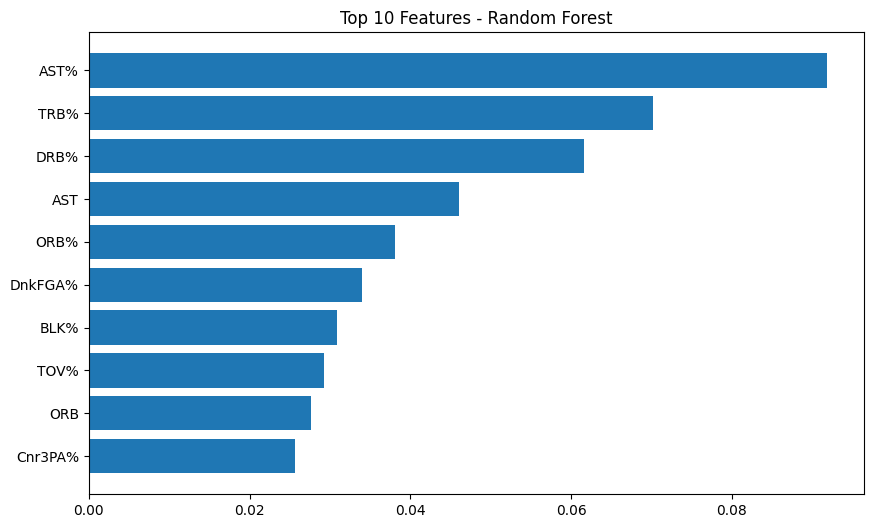

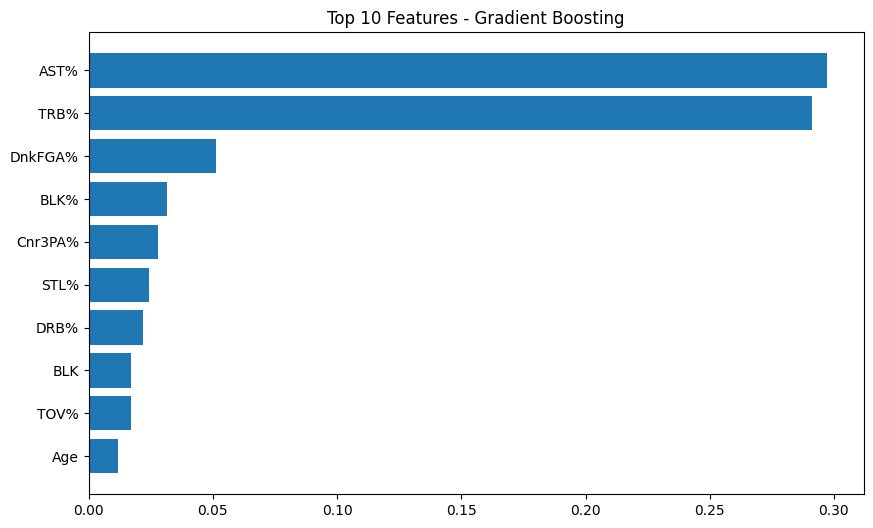

In [11]:
# Random Forest
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'][:10], rf_feature_importance['Importance'][:10])
plt.title('Top 10 Features - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(gb_feature_importance['Feature'][:10], gb_feature_importance['Importance'][:10])
plt.title('Top 10 Features - Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()

/var/folders/n0/mq3tzxbj4jldvrv_cdv2myfc0000gn/T/ipykernel_18766/55930851.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(10), palette="viridis")


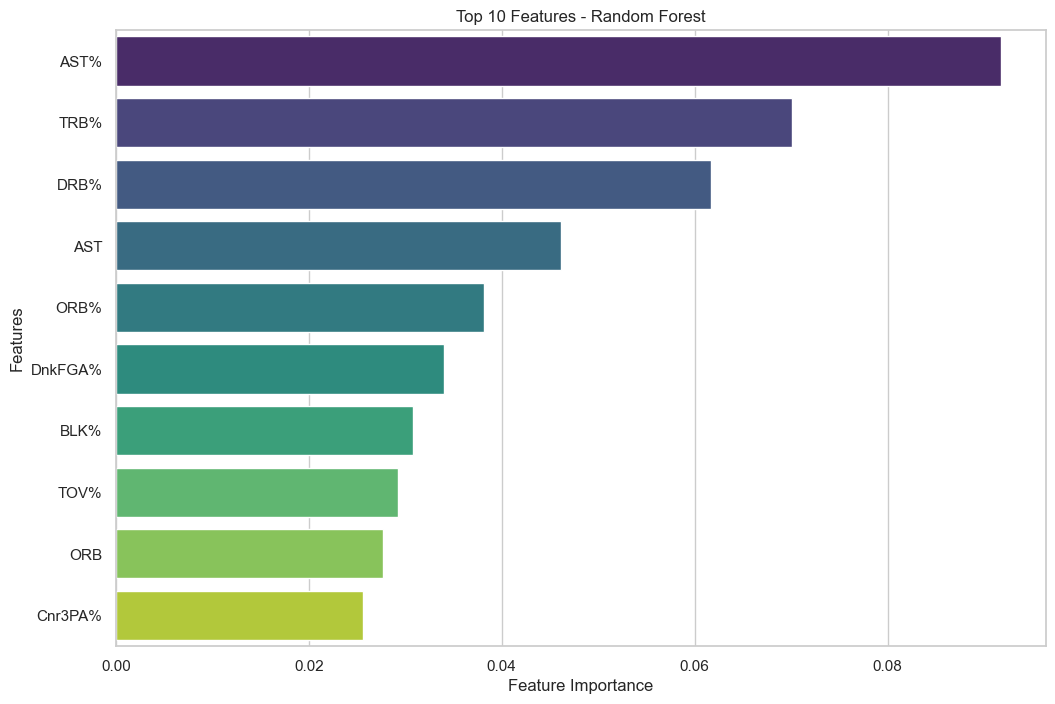

/var/folders/n0/mq3tzxbj4jldvrv_cdv2myfc0000gn/T/ipykernel_18766/55930851.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=gb_feature_importance.head(10), palette="coolwarm")


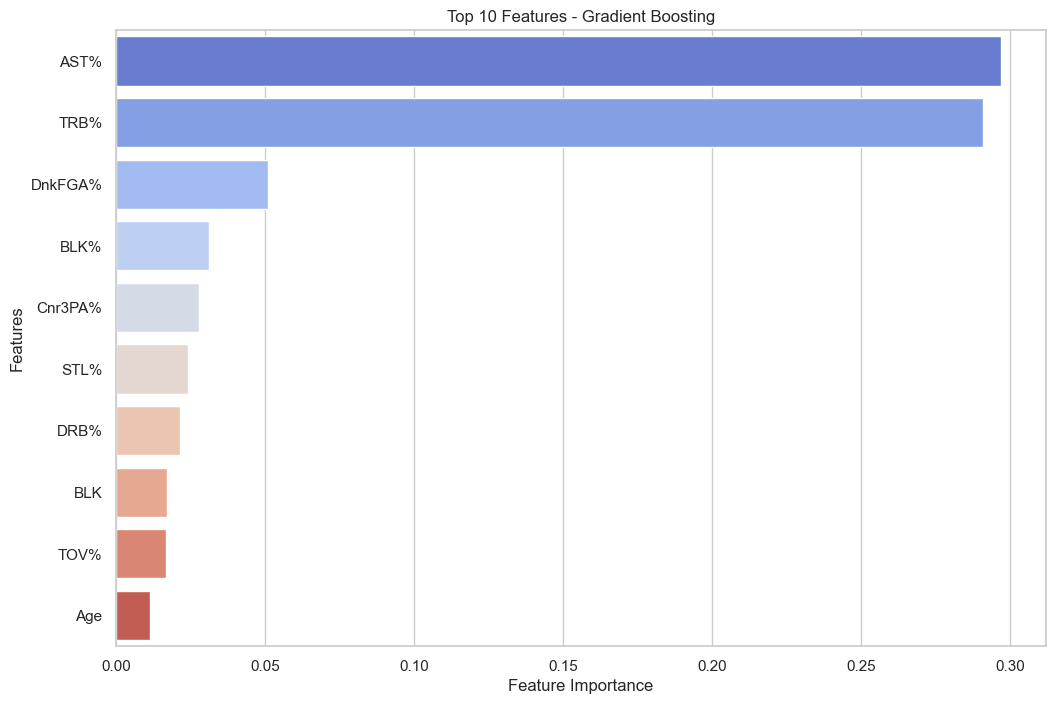

In [15]:
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Random Forest Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(10), palette="viridis")
plt.title('Top 10 Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# Gradient Boosting Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance.head(10), palette="coolwarm")
plt.title('Top 10 Features - Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


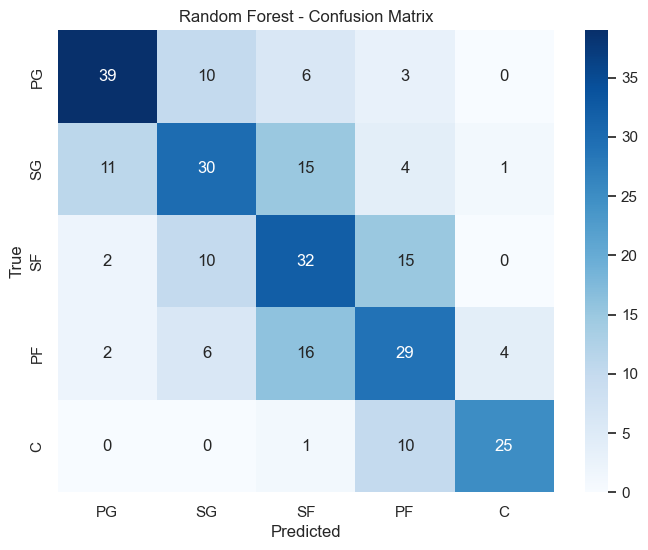

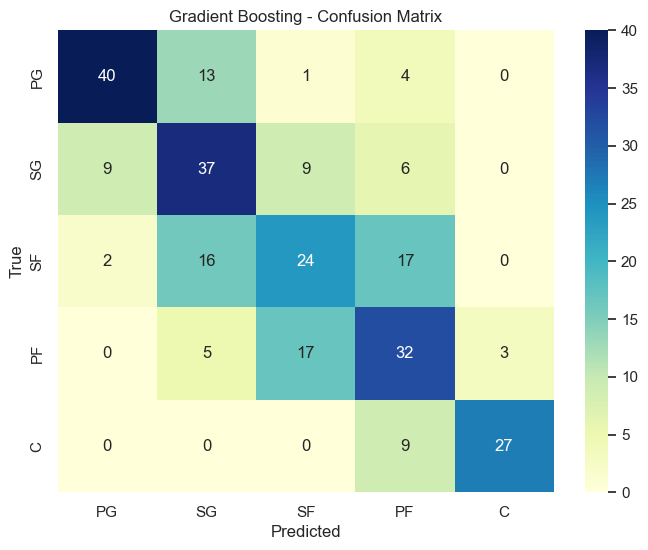

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired position order
position_order = ['PG', 'SG', 'SF', 'PF', 'C']

# Get the mapping of positions to numerical labels from the encoder
position_to_label = {pos: i for i, pos in enumerate(encoder.classes_)}
label_to_position = {i: pos for pos, i in position_to_label.items()}

# Map predictions and true labels back to position names
y_test_positions = [label_to_position[label] for label in y_test]
rf_pred_positions = [label_to_position[label] for label in rf_predictions]
gb_pred_positions = [label_to_position[label] for label in gb_predictions]

# Create confusion matrices aligned to the position order
rf_cm = confusion_matrix(
    y_test_positions, rf_pred_positions, labels=position_order
)
gb_cm = confusion_matrix(
    y_test_positions, gb_pred_positions, labels=position_order
)

# Plot Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    rf_cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=position_order, yticklabels=position_order
)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot Gradient Boosting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    gb_cm, annot=True, fmt="d", cmap="YlGnBu",
    xticklabels=position_order, yticklabels=position_order
)
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [22]:
# Convert classification reports to DataFrames
rf_report = classification_report(
    y_test_positions, rf_pred_positions, labels=position_order, output_dict=True
)
gb_report = classification_report(
    y_test_positions, gb_pred_positions, labels=position_order, output_dict=True
)

rf_report_df = pd.DataFrame(rf_report).transpose()
gb_report_df = pd.DataFrame(gb_report).transpose()

# Select relevant metrics and convert to percentages
metrics = ['precision', 'recall', 'f1-score']
rf_metrics_df = rf_report_df.loc[position_order, metrics] * 100
gb_metrics_df = gb_report_df.loc[position_order, metrics] * 100

# Format as percentages
rf_metrics_df = rf_metrics_df.round(2)
gb_metrics_df = gb_metrics_df.round(2)

# Display the metrics tables
print("Random Forest Metrics Table (Percentages):")
print(rf_metrics_df)

print("\nGradient Boosting Metrics Table (Percentages):")
print(gb_metrics_df)


Random Forest Metrics Table (Percentages):
    precision  recall  f1-score
PG      72.22   67.24     69.64
SG      53.57   49.18     51.28
SF      45.71   54.24     49.61
PF      47.54   50.88     49.15
C       83.33   69.44     75.76

Gradient Boosting Metrics Table (Percentages):
    precision  recall  f1-score
PG      78.43   68.97     73.39
SG      52.11   60.66     56.06
SF      47.06   40.68     43.64
PF      47.06   56.14     51.20
C       90.00   75.00     81.82


In this code, we converted the classification reports for Random Forest and Gradient Boosting models into structured DataFrames for a smoother and easier analysis. 

In [23]:
# Filter test_data to match the indices of X_test
test_data_filtered = test_data.loc[X_test.index]

# Get the predicted probabilities for each position
proba = rf_model.predict_proba(X_test)

# Extract the positional class labels (e.g., ['C', 'PF', 'PG', 'SF', 'SG'])
class_labels = rf_model.classes_

# Convert probabilities into a DataFrame for easier interpretation
proba_df = pd.DataFrame(proba, columns=class_labels)

# Calculate variance of positional probabilities for each player
proba_df["Variance"] = proba_df.var(axis=1)

# Add identifying information from `test_data`
# Ensure that test_data is filtered to match the indices of X_test
proba_df["Player"] = test_data_filtered["Player"].values
proba_df["Season"] = test_data_filtered["Season"].values

# Reorder columns for readability
proba_df = proba_df[["Player", "Season", "Variance"] + list(class_labels)]

# Display the results
print(proba_df)


                 Player  Season  Variance     0     1     2     3     4
0         Marcus Sasser    2024   0.12305  0.00  0.00  0.81  0.00  0.19
1         Dyson Daniels    2024   0.01920  0.01  0.23  0.13  0.38  0.25
2     Haywood Highsmith    2024   0.03740  0.01  0.39  0.02  0.41  0.17
3         Amen Thompson    2024   0.04415  0.39  0.46  0.02  0.11  0.02
4        Onyeka Okongwu    2024   0.09685  0.73  0.23  0.00  0.04  0.00
..                  ...     ...       ...   ...   ...   ...   ...   ...
266       Aaron Nesmith    2024   0.04815  0.04  0.22  0.01  0.56  0.17
267        Bobby Portis    2024   0.05305  0.30  0.55  0.00  0.14  0.01
268         Josh Giddey    2024   0.04010  0.25  0.53  0.09  0.08  0.05
269      Keyonte George    2024   0.06940  0.00  0.02  0.60  0.04  0.34
270  Karl-Anthony Towns    2024   0.06065  0.31  0.58  0.01  0.10  0.00

[271 rows x 8 columns]


In [24]:
import pandas as pd

# Get the predicted probabilities for each position from the Random Forest model
proba = rf_model.predict_proba(X_test)

# Extract the positional class labels (e.g., ['C', 'PF', 'PG', 'SF', 'SG'])
class_labels = rf_model.classes_

# Convert probabilities into a DataFrame for easier interpretation
proba_df = pd.DataFrame(proba, columns=class_labels)

# Calculate variance of positional probabilities for each player
proba_df["Variance"] = proba_df.var(axis=1)

# Add identifying information from `test_data_filtered`
proba_df["Player"] = test_data_filtered["Player"].values
proba_df["Season"] = test_data_filtered["Season"].values

# Reorder columns for readability
proba_df = proba_df[["Player", "Season", "Variance"] + list(class_labels)]

# Merge with nba_data on 'Player' and 'Season'
final_df = pd.merge(nba_data, proba_df, on=["Player", "Season"], how="left")

# Display the final dataframe with the Variance and Season columns
print(final_df[['Player', 'Season', 'Variance'] + list(class_labels)])  # Adjust as needed to display more columns


                  Player  Season  Variance     0     1     2     3     4
0           Matt Bullard    2001       NaN   NaN   NaN   NaN   NaN   NaN
1            Troy Hudson    2001       NaN   NaN   NaN   NaN   NaN   NaN
2              Jon Barry    2001       NaN   NaN   NaN   NaN   NaN   NaN
3          Erick Dampier    2001       NaN   NaN   NaN   NaN   NaN   NaN
4         Jamal Crawford    2001       NaN   NaN   NaN   NaN   NaN   NaN
...                  ...     ...       ...   ...   ...   ...   ...   ...
6633       Aaron Nesmith    2024   0.04815  0.04  0.22  0.01  0.56  0.17
6634        Bobby Portis    2024   0.05305  0.30  0.55  0.00  0.14  0.01
6635         Josh Giddey    2024   0.04010  0.25  0.53  0.09  0.08  0.05
6636      Keyonte George    2024   0.06940  0.00  0.02  0.60  0.04  0.34
6637  Karl-Anthony Towns    2024   0.06065  0.31  0.58  0.01  0.10  0.00

[6638 rows x 8 columns]


In [25]:
# Filter the final_df for the year 2024
final_df_2024 = final_df[final_df['Season'] == 2024]

# Drop rows with missing values (NaN) from the filtered DataFrame
final_df_2024_clean = final_df_2024.dropna()

# Display the cleaned dataframe
print(final_df_2024_clean[['Player', 'Season', 'Variance'] + list(class_labels)])



                  Player  Season  Variance     0     1     2     3     4
6314       Marcus Sasser    2024   0.12305  0.00  0.00  0.81  0.00  0.19
6316       Dyson Daniels    2024   0.01920  0.01  0.23  0.13  0.38  0.25
6317   Haywood Highsmith    2024   0.03740  0.01  0.39  0.02  0.41  0.17
6318       Amen Thompson    2024   0.04415  0.39  0.46  0.02  0.11  0.02
6319      Onyeka Okongwu    2024   0.09685  0.73  0.23  0.00  0.04  0.00
...                  ...     ...       ...   ...   ...   ...   ...   ...
6633       Aaron Nesmith    2024   0.04815  0.04  0.22  0.01  0.56  0.17
6634        Bobby Portis    2024   0.05305  0.30  0.55  0.00  0.14  0.01
6635         Josh Giddey    2024   0.04010  0.25  0.53  0.09  0.08  0.05
6636      Keyonte George    2024   0.06940  0.00  0.02  0.60  0.04  0.34
6637  Karl-Anthony Towns    2024   0.06065  0.31  0.58  0.01  0.10  0.00

[309 rows x 8 columns]


In [26]:
# Calculate POSL% using the provided formula
final_df_2024_clean['POSL%'] = (1 - 2.3 * final_df_2024_clean['Variance'] ** 0.5175) * 100

# Display the dataframe with the new POSL% column
print(final_df_2024_clean[['Player', 'Season', 'Variance', 'POSL%'] + list(class_labels)])


                  Player  Season  Variance      POSL%     0     1     2     3  \
6314       Marcus Sasser    2024   0.12305  22.224095  0.00  0.00  0.81  0.00   
6316       Dyson Daniels    2024   0.01920  70.260325  0.01  0.23  0.13  0.38   
6317   Haywood Highsmith    2024   0.03740  58.005841  0.01  0.39  0.02  0.41   
6318       Amen Thompson    2024   0.04415  54.240689  0.39  0.46  0.02  0.11   
6319      Onyeka Okongwu    2024   0.09685  31.287715  0.73  0.23  0.00  0.04   
...                  ...     ...       ...        ...   ...   ...   ...   ...   
6633       Aaron Nesmith    2024   0.04815  52.140141  0.04  0.22  0.01  0.56   
6634        Bobby Portis    2024   0.05305  49.678622  0.30  0.55  0.00  0.14   
6635         Josh Giddey    2024   0.04010  56.463346  0.25  0.53  0.09  0.08   
6636      Keyonte George    2024   0.06940  42.172907  0.00  0.02  0.60  0.04   
6637  Karl-Anthony Towns    2024   0.06065  46.068465  0.31  0.58  0.01  0.10   

         4  
6314  0.19  
6

/var/folders/n0/mq3tzxbj4jldvrv_cdv2myfc0000gn/T/ipykernel_18766/2456449183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_2024_clean['POSL%'] = (1 - 2.3 * final_df_2024_clean['Variance'] ** 0.5175) * 100


In [27]:
# Sort the DataFrame by POSL% from highest to lowest
final_df_2024_clean_sorted = final_df_2024_clean.sort_values(by='POSL%', ascending=False)

# Display the sorted DataFrame with the relevant columns
print(final_df_2024_clean_sorted[['Player', 'Season', 'Variance', 'POSL%'] + list(class_labels)])


                       Player  Season  Variance      POSL%     0     1     2  \
6539  Shai Gilgeous-Alexander    2024   0.00810  80.973065  0.07  0.19  0.17   
6435            Dalano Banton    2024   0.00985  78.946171  0.06  0.17  0.18   
6537             LeBron James    2024   0.01005  78.726019  0.11  0.20  0.30   
6486          Zion Williamson    2024   0.01045  78.291965  0.12  0.35  0.10   
6589             Cole Anthony    2024   0.01220  76.480989  0.01  0.23  0.23   
...                       ...     ...       ...        ...   ...   ...   ...   
6591              Nic Claxton    2024   0.16745   8.780350  0.93  0.07  0.00   
6528            Jarrett Allen    2024   0.16745   8.780350  0.93  0.07  0.00   
6564           Darius Garland    2024   0.17155   7.631257  0.00  0.00  0.94   
6532         Dennis SchrÃ¶der    2024   0.17180   7.561621  0.00  0.00  0.94   
6534         Dennis SchrÃ¶der    2024   0.17180   7.561621  0.00  0.00  0.94   

         3     4  
6539  0.28  0.29  
6

/Users/calebsharkey/Documents/Fall24/QTM347/qtm347/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/calebsharkey/Documents/Fall24/QTM347/qtm347/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/calebsharkey/Documents/Fall24/QTM347/qtm347/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/calebsharkey/Documents/Fall24/QTM347/qtm347/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/calebsharkey/Documents/Fall24/QTM347/qtm347/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` be

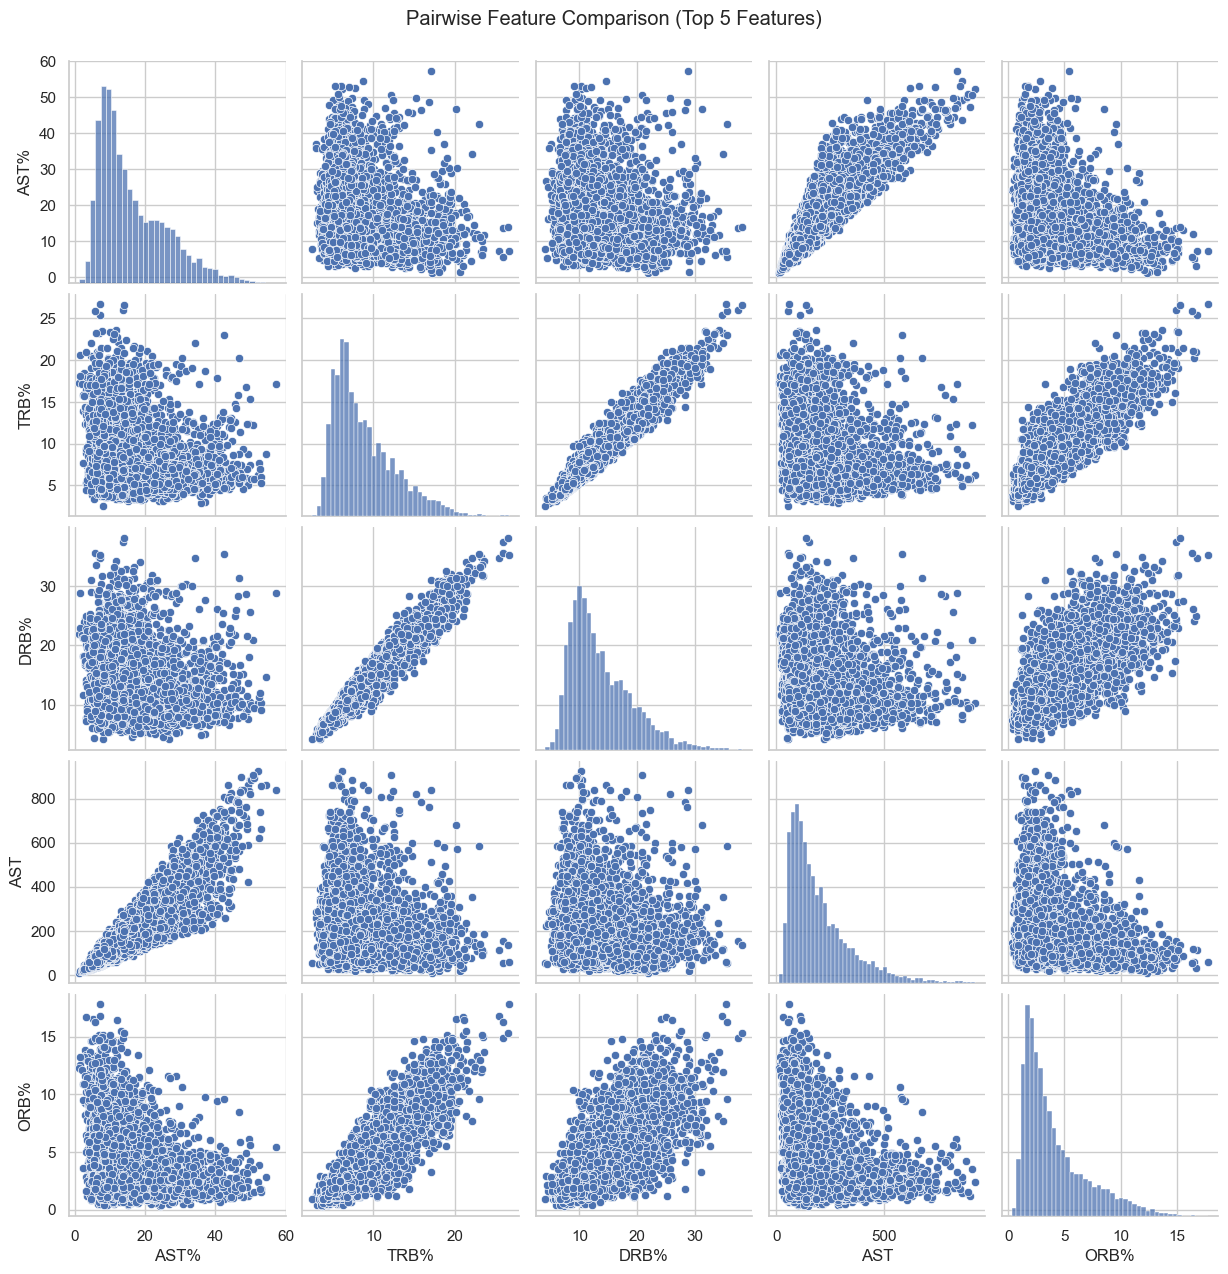

In [19]:
# Select top 5 important features
top_features = rf_feature_importance['Feature'][:5].values
top_features_data = X_train[top_features]

# Pairplot to visualize relationships between top features
sns.pairplot(top_features_data, palette='coolwarm')
plt.suptitle("Pairwise Feature Comparison (Top 5 Features)", y=1.02)
plt.show()

In [30]:
nba_data2 = pd.read_csv("/Users/calebsharkey/Documents/Fall24/QTM347/qtm347/nba_combinedstats_cleaned2.csv")

# Define the columns to calculate per-minute statistics for
stats_columns = ['3PA', '2PA', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']

# Calculate per-minute statistics
for col in stats_columns:
    if col in nba_data2.columns and 'MP' in nba_data2.columns:
        nba_data2[f'{col}_PM'] = nba_data2[col] / nba_data2['MP']
    else:
        print(f"Column {col} or 'MP' not found in the dataset.")

# Save the updated dataset with per-minute stats
nba_data2.columns


Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG%', 'AvgDist',
       '2PA%', '0-3A%', '3-10A%', '10-16A%', '16-3PA%', '3PA%', '2P%', '0-3%',
       '3-10%', '10-16%', '16-3P%', '3P%', 'DnkFGA%', 'Cnr3PA%', 'Cnr3P%',
       'FG', 'FGA', '3PM', '3PA', '3P%.1', '2PM', '2PA', '2P%.1', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PER',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'Season', 'PTS', '3PA_PM', '2PA_PM', 'FTA_PM', 'ORB_PM', 'DRB_PM',
       'AST_PM', 'STL_PM', 'BLK_PM', 'TOV_PM', 'PTS_PM'],
      dtype='object')

/var/folders/n0/mq3tzxbj4jldvrv_cdv2myfc0000gn/T/ipykernel_18766/1992127099.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')  # Force numeric, replacing invalids with NaN
/var/folders/n0/mq3tzxbj4jldvrv_cdv2myfc0000gn/T/ipykernel_18766/1992127099.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)  # Replace NaN with column mean


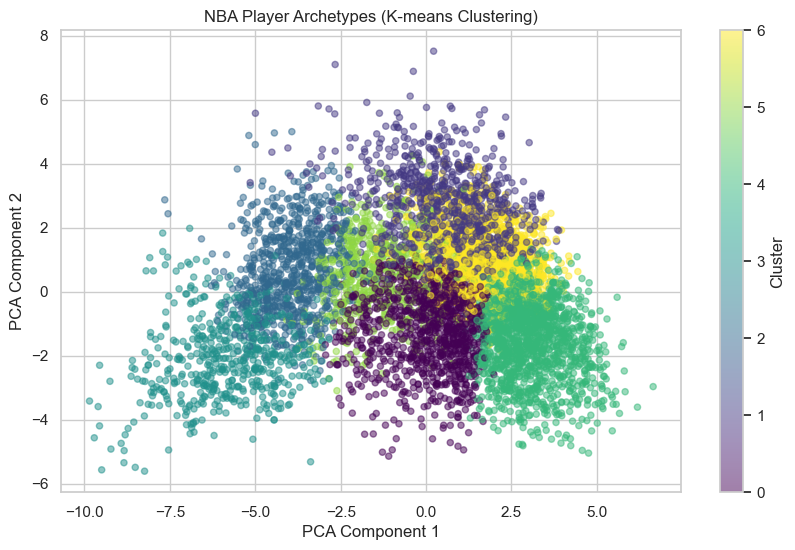

Cluster Means:
        FG%       FT%    AvgDist      2PA%      3PA%       2P%       3P%  \
0  0.464791  0.740461  12.594840  0.660302  0.339699  0.525360  0.349554   
1  0.460229  0.820780  13.539464  0.712134  0.287867  0.501923  0.350092   
2  0.498517  0.707892   7.071340  0.976603  0.023400  0.504774  0.131238   
3  0.574615  0.612294   4.002407  0.976631  0.023369  0.582481  0.154176   
4  0.421718  0.802413  17.800420  0.457289  0.542713  0.477563  0.376367   
5  0.461063  0.756155  10.927635  0.930674  0.069330  0.472684  0.251659   
6  0.423296  0.795672  14.368536  0.709128  0.290874  0.453126  0.341895   

      0-3A%    3-10A%   10-16A%  ...    3PA_PM    2PA_PM    FTA_PM    ORB_PM  \
0  0.321803  0.167716  0.075218  ...  0.109847  0.214751  0.080327  0.046352   
1  0.250225  0.163064  0.134410  ...  0.141511  0.346640  0.167517  0.029564   
2  0.417820  0.273696  0.147926  ...  0.008975  0.335451  0.123026  0.086070   
3  0.638400  0.237104  0.060326  ...  0.006665  0.241145

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the columns for clustering
kmeans_columns = ['FG%', 'FT%', 'AvgDist', '2PA%', '3PA%', '2P%', '3P%',
               '0-3A%', '3-10A%', '10-16A%', '16-3PA%', 'DnkFGA%', 
               'Cnr3PA%', '3PA_PM', '2PA_PM', 'FTA_PM', 'ORB_PM', 
               'DRB_PM', 'AST_PM', 'STL_PM', 'BLK_PM', 'TOV_PM', 'PTS_PM']

# Prepare the data
data = nba_data2[kmeans_columns]

# Ensure all columns are numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Force numeric, replacing invalids with NaN

# Replace NaN valus
data.fillna(data.mean(), inplace=True)  # Replace NaN with column mean

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform K-means clustering
n_clusters = 7  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
data = data.reset_index(drop=True)  # Align indices
nba_data2 = nba_data2.loc[data.index]
nba_data2['Cluster'] = clusters

# Calculate cluster means explicitly
cluster_means = {}
for cluster in range(n_clusters):
    cluster_data = nba_data2[nba_data2['Cluster'] == cluster]
    cluster_means[cluster] = cluster_data[kmeans_columns].mean().to_dict()

# Convert cluster means to a DataFrame for readability
cluster_means_df = pd.DataFrame(cluster_means).transpose()

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=20, alpha=0.5)
plt.title('NBA Player Archetypes (K-means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Print cluster means
print("Cluster Means:")
print(cluster_means_df)


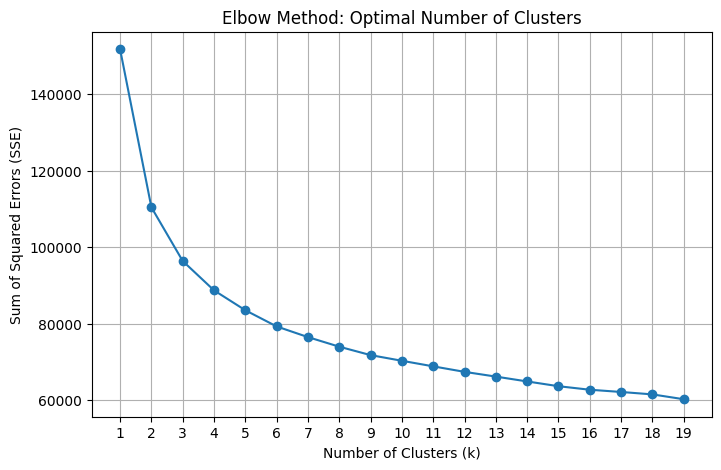

In [ ]:
import random
random.seed(123)
sse = []
k_values = range(1, 20)  # Test 1 to 20 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  
    # Inertia is the sum of squared distances to the nearest cluster center

# Visualize K vs SSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()



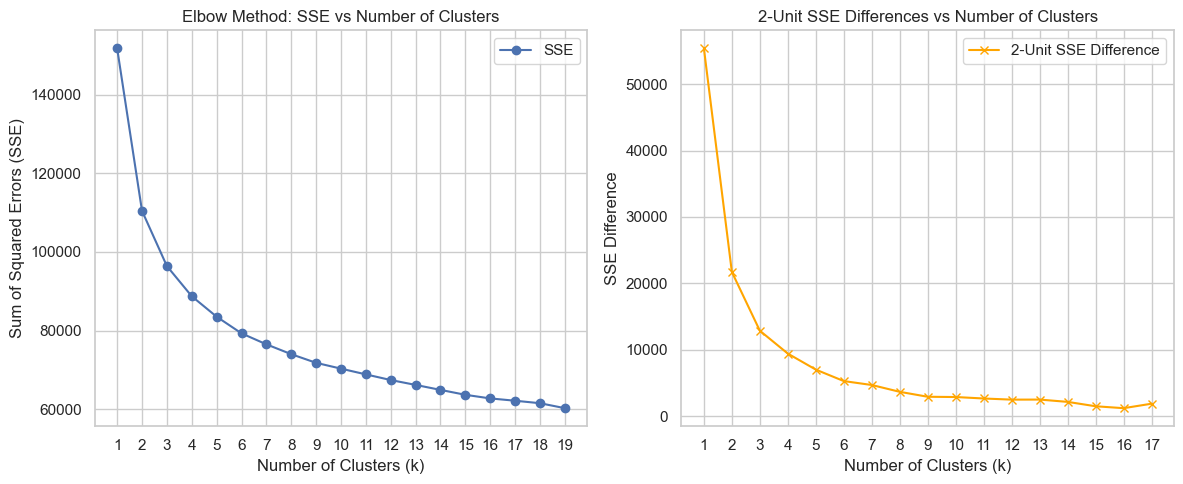

In [34]:


# Sample data reconstruction (as the session was reset, using random data for demonstration)
import numpy as np
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 5), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])


# Calculate SSE for different numbers of clusters
sse = []
k_values = range(1, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  

# Calculate 2-unit differences in SSE
sse_diff = [sse[i] - sse[i+2] for i in range(len(sse) - 2)]

# Visualize K vs SSE and the 2-unit differences
plt.figure(figsize=(12, 5))

# Plot SSE vs K
plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o', label='SSE')
plt.title('Elbow Method: SSE vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.legend()

# Plot 2-unit SSE differences
plt.subplot(1, 2, 2)
plt.plot(k_values[:-2], sse_diff, marker='x', label='2-Unit SSE Difference', color='orange')
plt.title('2-Unit SSE Differences vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE Difference')
plt.xticks(k_values[:-2])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


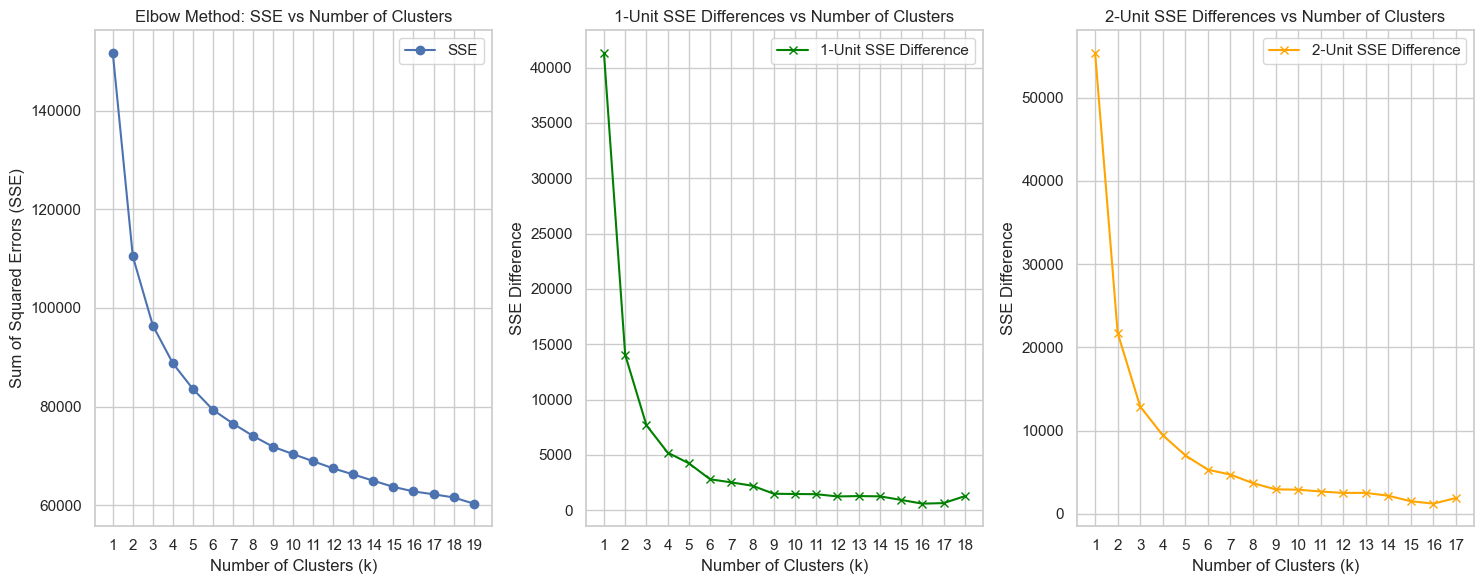

In [53]:
# Calculate 1-unit and 2-unit differences in SSE
sse_diff_1 = [sse[i] - sse[i+1] for i in range(len(sse) - 1)]
sse_diff_2 = [sse[i] - sse[i+2] for i in range(len(sse) - 2)]

# Visualize K vs SSE and the 1-unit and 2-unit differences
plt.figure(figsize=(15, 6))

# Plot SSE vs K
plt.subplot(1, 3, 1)
plt.plot(k_values, sse, marker='o', label='SSE')
plt.title('Elbow Method: SSE vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.legend()

# Plot 1-unit SSE differences
plt.subplot(1, 3, 2)
plt.plot(k_values[:-1], sse_diff_1, marker='x', label='1-Unit SSE Difference', color='green')
plt.title('1-Unit SSE Differences vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE Difference')
plt.xticks(k_values[:-1])
plt.grid(True)
plt.legend()

# Plot 2-unit SSE differences
plt.subplot(1, 3, 3)
plt.plot(k_values[:-2], sse_diff_2, marker='x', label='2-Unit SSE Difference', color='orange')
plt.title('2-Unit SSE Differences vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE Difference')
plt.xticks(k_values[:-2])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


/var/folders/n0/mq3tzxbj4jldvrv_cdv2myfc0000gn/T/ipykernel_18766/1708986112.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')  # Force numeric, replacing invalids with NaN
/var/folders/n0/mq3tzxbj4jldvrv_cdv2myfc0000gn/T/ipykernel_18766/1708986112.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)  # Replace NaN with column mean


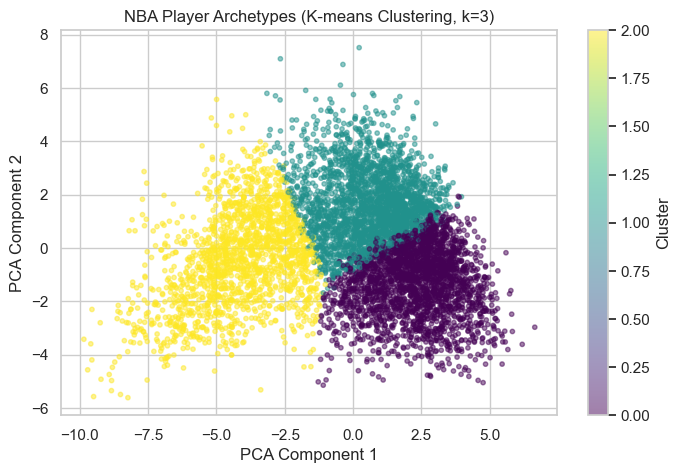

Cluster Means for k=3:
        FG%       FT%    AvgDist      2PA%      3PA%       2P%       3P%  \
0  0.428835  0.785422  16.389219  0.524694  0.475308  0.483736  0.366743   
1  0.445900  0.795680  13.151828  0.762663  0.237339  0.477232  0.333153   
2  0.520363  0.680972   6.644671  0.957202  0.042800  0.531652  0.163236   

      0-3A%    3-10A%   10-16A%  ...    3PA_PM    2PA_PM    FTA_PM    ORB_PM  \
0  0.204843  0.110461  0.073366  ...  0.151471  0.167550  0.063405  0.027181   
1  0.260270  0.147708  0.133275  ...  0.098527  0.300643  0.118521  0.030567   
2  0.481640  0.240016  0.114023  ...  0.014551  0.291242  0.112630  0.088989   

     DRB_PM    AST_PM    STL_PM    BLK_PM    TOV_PM    PTS_PM  
0  0.109769  0.082365  0.031213  0.013219  0.044458  0.379967  
1  0.113647  0.132047  0.034605  0.012341  0.068619  0.486566  
2  0.185100  0.054865  0.026772  0.040181  0.055315  0.398610  

[3 rows x 23 columns]

--------------------------------------------------



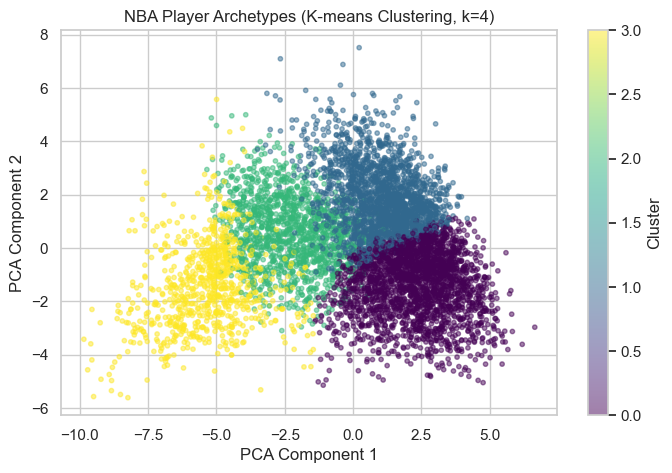

Cluster Means for k=4:
        FG%       FT%    AvgDist      2PA%      3PA%       2P%       3P%  \
0  0.429042  0.784252  16.365773  0.525169  0.474833  0.484119  0.367021   
1  0.442323  0.806252  13.676394  0.727224  0.272777  0.476965  0.343061   
2  0.475641  0.736604   9.512565  0.928892  0.071111  0.489465  0.223487   
3  0.555905  0.636281   4.776056  0.963426  0.036575  0.567291  0.142529   

      0-3A%    3-10A%   10-16A%  ...    3PA_PM    2PA_PM    FTA_PM    ORB_PM  \
0  0.205887  0.109920  0.073191  ...  0.150652  0.167724  0.063215  0.027415   
1  0.248881  0.145113  0.129000  ...  0.114835  0.297536  0.123704  0.025257   
2  0.351176  0.200698  0.151268  ...  0.025151  0.313750  0.104538  0.068571   
3  0.583729  0.255728  0.074076  ...  0.011790  0.262406  0.114971  0.099674   

     DRB_PM    AST_PM    STL_PM    BLK_PM    TOV_PM    PTS_PM  
0  0.110064  0.080370  0.031197  0.013274  0.044091  0.378927  
1  0.107764  0.148423  0.035844  0.010686  0.072679  0.507371  
2  

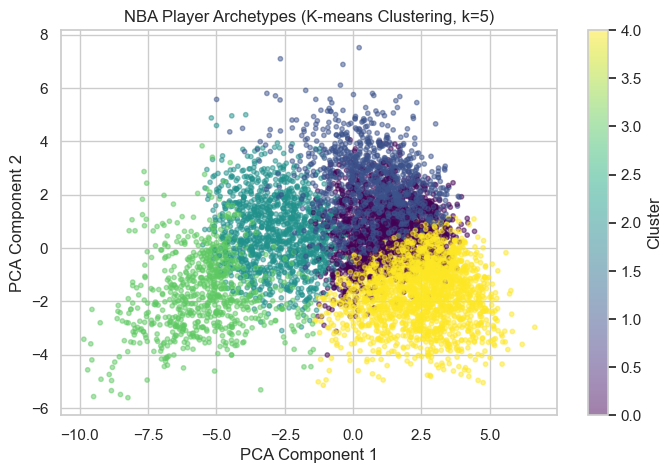

Cluster Means for k=5:
        FG%       FT%    AvgDist      2PA%      3PA%       2P%       3P%  \
0  0.429800  0.782641  13.771760  0.747364  0.252638  0.457922  0.335165   
1  0.456295  0.816625  13.559197  0.703547  0.296454  0.498003  0.351191   
2  0.482273  0.731106   8.806271  0.946565  0.053438  0.493597  0.193670   
3  0.561239  0.629181   4.598294  0.962934  0.037067  0.572621  0.150676   
4  0.430581  0.785972  16.732972  0.490667  0.509335  0.490809  0.370459   

      0-3A%    3-10A%   10-16A%  ...    3PA_PM    2PA_PM    FTA_PM    ORB_PM  \
0  0.250741  0.122886  0.120156  ...  0.086192  0.249517  0.084678  0.026502   
1  0.251807  0.165226  0.128281  ...  0.139208  0.328549  0.152962  0.028903   
2  0.368595  0.219079  0.155497  ...  0.019300  0.322736  0.109302  0.075132   
3  0.597727  0.251917  0.068186  ...  0.011378  0.255679  0.113209  0.100542   
4  0.200248  0.109153  0.066988  ...  0.161454  0.157613  0.061675  0.027428   

     DRB_PM    AST_PM    STL_PM    BLK_

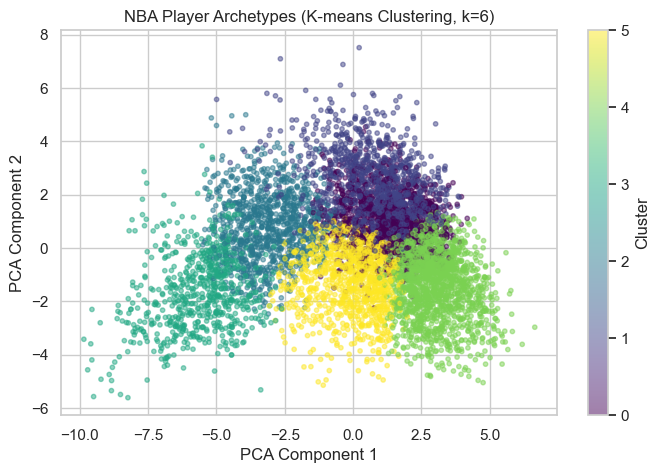

Cluster Means for k=6:
        FG%       FT%    AvgDist      2PA%      3PA%       2P%       3P%  \
0  0.426069  0.789271  13.910482  0.756688  0.243313  0.451924  0.332187   
1  0.456907  0.820172  13.649169  0.701618  0.298383  0.498441  0.352384   
2  0.483949  0.732487   8.518702  0.972102  0.027901  0.490484  0.161676   
3  0.564250  0.622742   4.255222  0.976682  0.023319  0.572001  0.140835   
4  0.421946  0.802549  17.669883  0.464030  0.535972  0.477147  0.375821   
5  0.465302  0.736907  12.328911  0.680293  0.319709  0.522756  0.345196   

      0-3A%    3-10A%   10-16A%  ...    3PA_PM    2PA_PM    FTA_PM    ORB_PM  \
0  0.240449  0.120664  0.127256  ...  0.085192  0.259395  0.088538  0.023960   
1  0.248355  0.164234  0.129771  ...  0.143332  0.335667  0.159881  0.028617   
2  0.369022  0.223983  0.165929  ...  0.010557  0.332825  0.112681  0.077490   
3  0.610092  0.254629  0.067602  ...  0.007103  0.256021  0.114441  0.103089   
4  0.167196  0.096631  0.070256  ...  0.1720

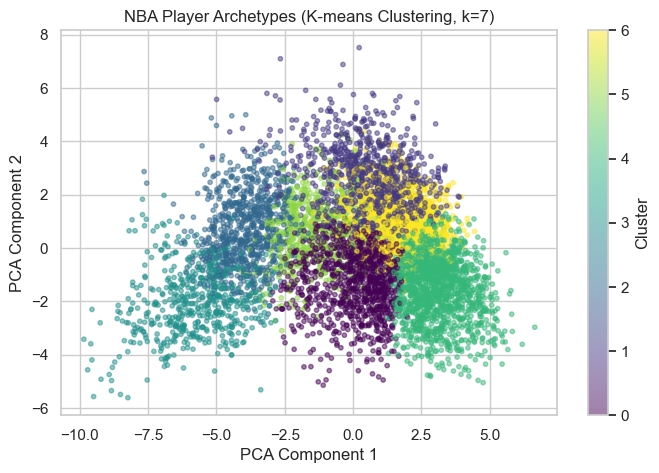

Cluster Means for k=7:
        FG%       FT%    AvgDist      2PA%      3PA%       2P%       3P%  \
0  0.464791  0.740461  12.594840  0.660302  0.339699  0.525360  0.349554   
1  0.460229  0.820780  13.539464  0.712134  0.287867  0.501923  0.350092   
2  0.498517  0.707892   7.071340  0.976603  0.023400  0.504774  0.131238   
3  0.574615  0.612294   4.002407  0.976631  0.023369  0.582481  0.154176   
4  0.421718  0.802413  17.800420  0.457289  0.542713  0.477563  0.376367   
5  0.461063  0.756155  10.927635  0.930674  0.069330  0.472684  0.251659   
6  0.423296  0.795672  14.368536  0.709128  0.290874  0.453126  0.341895   

      0-3A%    3-10A%   10-16A%  ...    3PA_PM    2PA_PM    FTA_PM    ORB_PM  \
0  0.321803  0.167716  0.075218  ...  0.109847  0.214751  0.080327  0.046352   
1  0.250225  0.163064  0.134410  ...  0.141511  0.346640  0.167517  0.029564   
2  0.417820  0.273696  0.147926  ...  0.008975  0.335451  0.123026  0.086070   
3  0.638400  0.237104  0.060326  ...  0.006665  

In [36]:
# Define the columns for clustering
kmeans_columns = ['FG%', 'FT%', 'AvgDist', '2PA%', '3PA%', '2P%', '3P%',
               '0-3A%', '3-10A%', '10-16A%', '16-3PA%', 'DnkFGA%', 
               'Cnr3PA%', '3PA_PM', '2PA_PM', 'FTA_PM', 'ORB_PM', 
               'DRB_PM', 'AST_PM', 'STL_PM', 'BLK_PM', 'TOV_PM', 'PTS_PM']

# Prepare the data
data = nba_data2[kmeans_columns]

# Ensure all columns are numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Force numeric, replacing invalids with NaN

# Replace NaN or problematic values
data.fillna(data.mean(), inplace=True)  # Replace NaN with column mean

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Loop over different numbers of clusters
for n_clusters in [3, 4, 5, 6, 7]:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Add cluster labels to the original DataFrame
    data = data.reset_index(drop=True)  # Align indices
    nba_data2 = nba_data2.loc[data.index]
    nba_data2['Cluster'] = clusters

    # Calculate cluster means explicitly
    cluster_means = {}
    for cluster in range(n_clusters):
        cluster_data = nba_data2[nba_data2['Cluster'] == cluster]
        cluster_means[cluster] = cluster_data[kmeans_columns].mean().to_dict()

    # Convert cluster means to a DataFrame for readability
    cluster_means_df = pd.DataFrame(cluster_means).transpose()

    # Visualize the clusters
    plt.figure(figsize=(8, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.5)
    plt.title(f'NBA Player Archetypes (K-means Clustering, k={n_clusters})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

    # Print cluster means for this k
    print(f"Cluster Means for k={n_clusters}:")
    print(cluster_means_df)
    print("\n" + "-"*50 + "\n")


In [38]:
# Find the centerpoint for each cluster
centerpoints = {}
for cluster in range(n_clusters):
    # Get cluster data
    cluster_indices = nba_data2[nba_data2['Cluster'] == cluster].index
    cluster_points = X_scaled[cluster_indices]
    cluster_centroid = kmeans.cluster_centers_[cluster]
    
    # Calculate distances to the centroid
    distances = np.linalg.norm(cluster_points - cluster_centroid, axis=1)
    closest_index = cluster_indices[np.argmin(distances)]
    
    # Save the player closest to the centroid
    centerpoints[cluster] = nba_data2.loc[closest_index]

# Display the centerpoints
for cluster, centerpoint in centerpoints.items():
    print(f"Cluster {cluster} Centerpoint:")
    print(centerpoint)
    print("\n" + "-"*50 + "\n")

    print(nba_data2.groupby('Cluster').size())

Cluster 0 Centerpoint:
Player     Jeff Green
Age              23.0
Team              OKC
Pos                PF
G                82.0
              ...    
STL_PM       0.034177
BLK_PM       0.023661
TOV_PM       0.044364
PTS_PM       0.407164
Cluster             0
Name: 2581, Length: 66, dtype: object

--------------------------------------------------

Cluster
0     969
1     783
2     806
3     540
4    1427
5     702
6    1373
dtype: int64
Cluster 1 Centerpoint:
Player     Gordon Hayward
Age                  24.0
Team                  UTA
Pos                    SF
G                    76.0
                ...      
STL_PM           0.041253
BLK_PM           0.011459
TOV_PM           0.078686
PTS_PM           0.558824
Cluster                 1
Name: 3824, Length: 66, dtype: object

--------------------------------------------------

Cluster
0     969
1     783
2     806
3     540
4    1427
5     702
6    1373
dtype: int64
Cluster 2 Centerpoint:
Player     Drew Gooden
Age             

In [41]:
# Define the number of clusters
n_clusters = 6

# Perform K-means clustering for k=6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
data = data.reset_index(drop=True)  # Align indices
nba_data2 = nba_data2.loc[data.index]
nba_data2['Cluster'] = clusters

# Calculate cluster means explicitly
cluster_means_df = nba_data2.groupby('Cluster')[kmeans_columns].mean()

# Save the cluster means for k=6 to a DataFrame
k6_cluster_means_df = cluster_means_df.copy()

# Display the DataFrame for verification
print("Cluster Means for k=6:")
print(k6_cluster_means_df)

# Optionally, export it to a CSV file
k6_cluster_means_df.to_csv('cluster_means_k6.csv', index=True)


Cluster Means for k=6:
              FG%       FT%    AvgDist      2PA%      3PA%       2P%  \
Cluster                                                                
0        0.426069  0.789271  13.910482  0.756688  0.243313  0.451924   
1        0.456907  0.820172  13.649169  0.701618  0.298383  0.498441   
2        0.483949  0.732487   8.518702  0.972102  0.027901  0.490484   
3        0.564250  0.622742   4.255222  0.976682  0.023319  0.572001   
4        0.421946  0.802549  17.669883  0.464030  0.535972  0.477147   
5        0.465302  0.736907  12.328911  0.680293  0.319709  0.522756   

              3P%     0-3A%    3-10A%   10-16A%  ...    3PA_PM    2PA_PM  \
Cluster                                          ...                       
0        0.332187  0.240449  0.120664  0.127256  ...  0.085192  0.259395   
1        0.352384  0.248355  0.164234  0.129771  ...  0.143332  0.335667   
2        0.161676  0.369022  0.223983  0.165929  ...  0.010557  0.332825   
3        0.140835  0

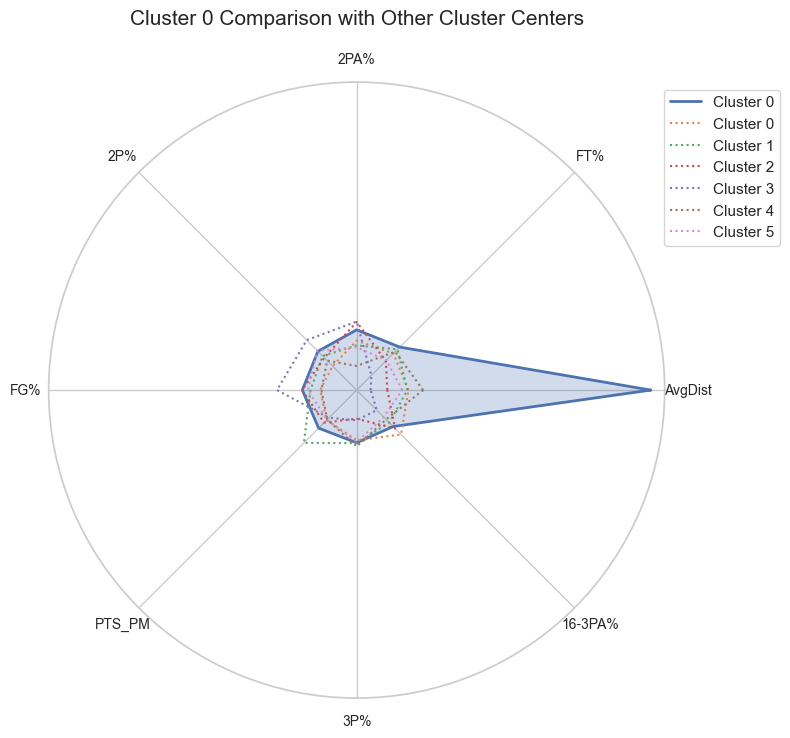

In [43]:
# Radar Chart

# Calculate the mean values for Cluster 0
cluster_0_mean = nba_data2[nba_data2['Cluster'] == 0][kmeans_columns].mean()

# Get the centroids for all clusters
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=kmeans_columns)

# Select the top 8 variables based on variance in Cluster 0
variable_variance = cluster_0_mean.var()
top_8_variables = cluster_0_mean.sort_values(ascending=False).head(8).index.tolist()

# Filter data for the top 8 variables
cluster_0_mean = cluster_0_mean[top_8_variables]
cluster_centroids = cluster_centroids[top_8_variables]

# Prepare the radar chart
labels = top_8_variables
num_vars = len(labels)

# Calculate angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Prepare the data for Cluster 0 and other clusters
cluster_0_values = cluster_0_mean.values.tolist()
cluster_0_values += cluster_0_values[:1]  # Close the circle

cluster_centroid_values = []
for i in range(len(cluster_centroids)):
    values = cluster_centroids.iloc[i].values.tolist()
    values += values[:1]
    cluster_centroid_values.append(values)

# Plot the radar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Add Cluster 0 data
ax.plot(angles, cluster_0_values, label='Cluster 0', linewidth=2, linestyle='solid')
ax.fill(angles, cluster_0_values, alpha=0.25)

# Add other clusters
for i, centroid_values in enumerate(cluster_centroid_values):
    ax.plot(angles, centroid_values, label=f'Cluster {i}', linestyle='dotted')

# Configure the chart
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
plt.title("Cluster 0 Comparison with Other Cluster Centers", size=15, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


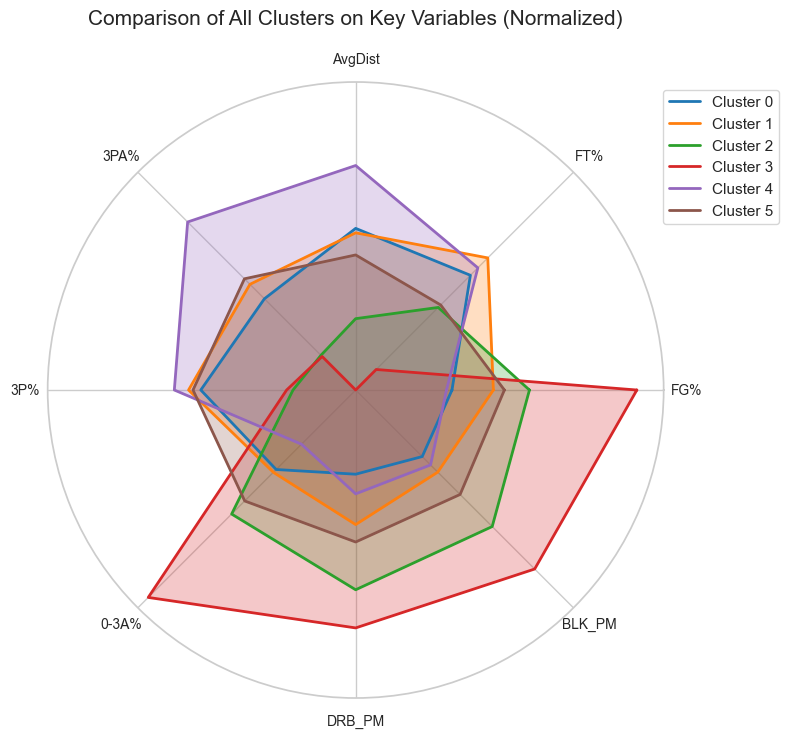

In [46]:

# Get the centroids for all clusters
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=kmeans_columns)

# Select the top 8 variables based on variance across all clusters
variable_variance = cluster_centroids.var().sort_values(ascending=False)
top_8_variables = variable_variance.head(8).index.tolist()
top_8 = ['FG%', 'FT%', 'AvgDist', '3PA%', '3P%',
    '0-3A%', 'DRB_PM','BLK_PM']

# Filter data for the top 8 variables
cluster_centroids = cluster_centroids[top_8]

# Normalize centroids for the radar chart
min_val = cluster_centroids.min().min()
max_val = cluster_centroids.max().max()
normalized_centroids = (cluster_centroids - min_val) / (max_val - min_val)

# Prepare the radar chart
labels = top_8
num_vars = len(labels)

# Calculate angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Prepare the data for all clusters
all_cluster_values = []
for i in range(len(normalized_centroids)):
    values = normalized_centroids.iloc[i].values.tolist()
    values += values[:1]  # Close the circle
    all_cluster_values.append(values)

# Plot the radar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Add data for each cluster
colors = plt.cm.tab10.colors  # Use a qualitative colormap
for i, cluster_values in enumerate(all_cluster_values):
    ax.plot(angles, cluster_values, label=f'Cluster {i}', color=colors[i], linewidth=2)
    ax.fill(angles, cluster_values, alpha=0.25, color=colors[i])

# Configure the chart
ax.set_yticks([])  # Remove radial ticks for cleaner look
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
plt.title("Comparison of All Clusters on Key Variables (Normalized)", size=15, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


Pos              C         PF         PG         SF         SG
Cluster                                                       
0         0.991501   4.886686  47.662890  16.713881  29.745042
1         4.983389  11.849391  38.427464  16.722038  28.017719
2        44.282946  42.635659   1.453488   9.689922   1.937984
3        76.967096  20.171674   0.572246   1.859800   0.429185
4         1.554404  14.766839  18.134715  26.683938  38.860104
5         9.108911  32.871287   4.455446  36.039604  17.524752


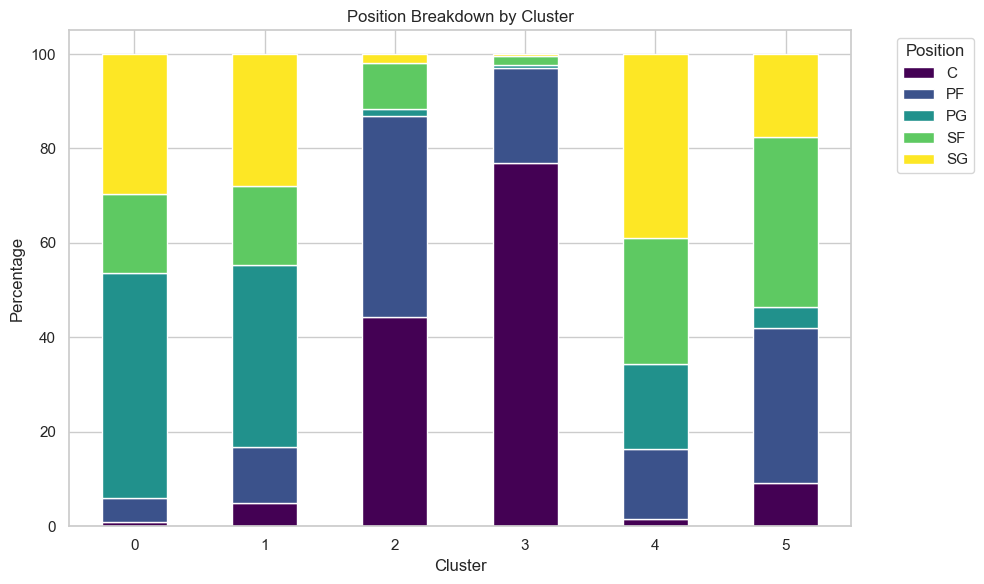

In [47]:
# Calculate position breakdown by cluster
position_breakdown = nba_data2.groupby('Cluster')['Pos'].value_counts(normalize=True).unstack()

# Display the position breakdown as percentages
position_breakdown = position_breakdown * 100  # Convert to percentages
print(position_breakdown)

import matplotlib.pyplot as plt

# Plot stacked bar chart
position_breakdown.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Position Breakdown by Cluster')
plt.ylabel('Percentage')
plt.xlabel('Cluster')
plt.xticks(rotation=0)  
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


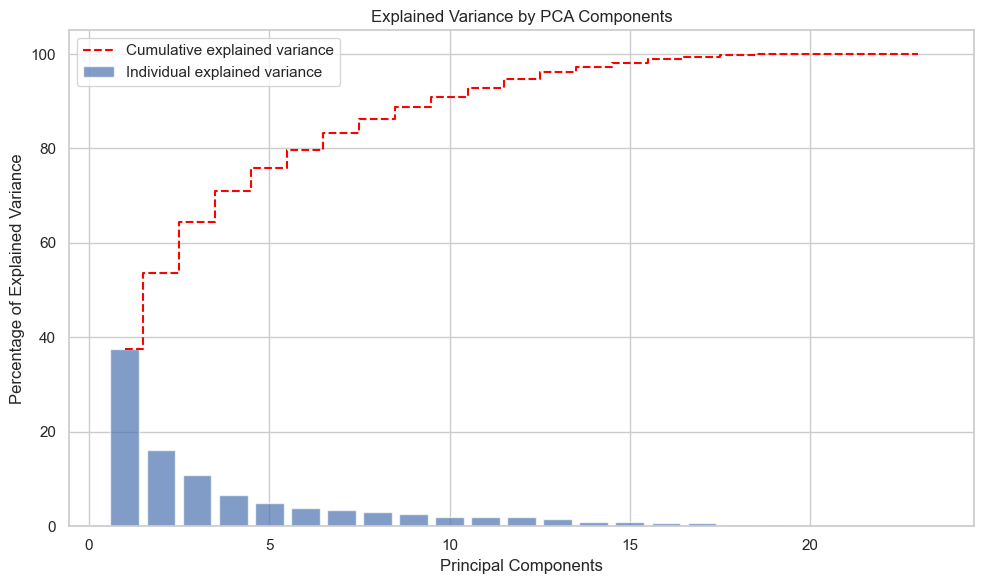

(AvgDist    0.326543
 ORB_PM     0.297222
 3PA%       0.291128
 2PA%       0.291128
 0-3A%      0.290040
 3PA_PM     0.275014
 FG%        0.264673
 DnkFGA%    0.256871
 BLK_PM     0.237334
 DRB_PM     0.235847
 Name: PCA1, dtype: float64,
 2PA_PM     0.407261
 TOV_PM     0.382765
 PTS_PM     0.353187
 FTA_PM     0.337264
 10-16A%    0.296512
 AST_PM     0.285433
 16-3PA%    0.222116
 Cnr3PA%    0.193932
 FT%        0.186172
 DnkFGA%    0.171764
 Name: PCA2, dtype: float64)

In [49]:

# Perform PCA analysis on the scaled data
from sklearn.decomposition import PCA

# Initialize PCA with all components to explain variance
pca_full = PCA()
pca_full.fit(X_scaled)

# Get explained variance ratio for each component
explained_variance = pca_full.explained_variance_ratio_ * 100  # Convert to percentages
cumulative_variance = np.cumsum(explained_variance)  # Cumulative variance

# Visualize explained variance by component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance', color='red', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Identify the most influential variables in the first two components
loadings = pd.DataFrame(pca_full.components_[:2], columns=kmeans_columns).transpose()
loadings.columns = ['PCA1', 'PCA2']

# Sort variables by absolute contribution to PCA1 and PCA2
top_pca1 = loadings['PCA1'].abs().sort_values(ascending=False).head(10)
top_pca2 = loadings['PCA2'].abs().sort_values(ascending=False).head(10)

# Display key variables contributing to PCA1 and PCA2
top_pca1, top_pca2


In [52]:

# Perform PCA on scaled data
from sklearn.decomposition import PCA

# Fit PCA on the scaled dataset
pca_full = PCA()
pca_full.fit(X_scaled)

# Extract PCA loadings (components)
loadings = pd.DataFrame(pca_full.components_[:2], columns=kmeans_columns)  # First 2 components
loadings.index = ['PCA1', 'PCA2']

# Sort features by absolute contribution for PCA1 and PCA2
top_features_pca1 = loadings.loc['PCA1'].abs().sort_values(ascending=False).head(10)
top_features_pca2 = loadings.loc['PCA2'].abs().sort_values(ascending=False).head(10)

print("Top features contributing to PCA1:")
print(top_features_pca1)

print("\nTop features contributing to PCA2:")
print(top_features_pca2)


Top features contributing to PCA1:
AvgDist    0.326543
ORB_PM     0.297222
3PA%       0.291128
2PA%       0.291128
0-3A%      0.290040
3PA_PM     0.275014
FG%        0.264673
DnkFGA%    0.256871
BLK_PM     0.237334
DRB_PM     0.235847
Name: PCA1, dtype: float64

Top features contributing to PCA2:
2PA_PM     0.407261
TOV_PM     0.382765
PTS_PM     0.353187
FTA_PM     0.337264
10-16A%    0.296512
AST_PM     0.285433
16-3PA%    0.222116
Cnr3PA%    0.193932
FT%        0.186172
DnkFGA%    0.171764
Name: PCA2, dtype: float64
